# requirement

In [ ]:

!pip install pyplatform-datawarehouse

# set up

In [ ]:
import os
if os.environ['GOOGLE_APPLICATION_CREDENTIALS']:
    print('credentials are set!')

In [ ]:

os.environ['GOOGLE_APPLICATION_CREDENTIALS']


In [ ]:
import pyplatform.datawarehouse as dw
from pyplatform.common import *

In [ ]:
show_me(dw)

In [ ]:

from pyplatform.datawarehouse import *


# App Architechture

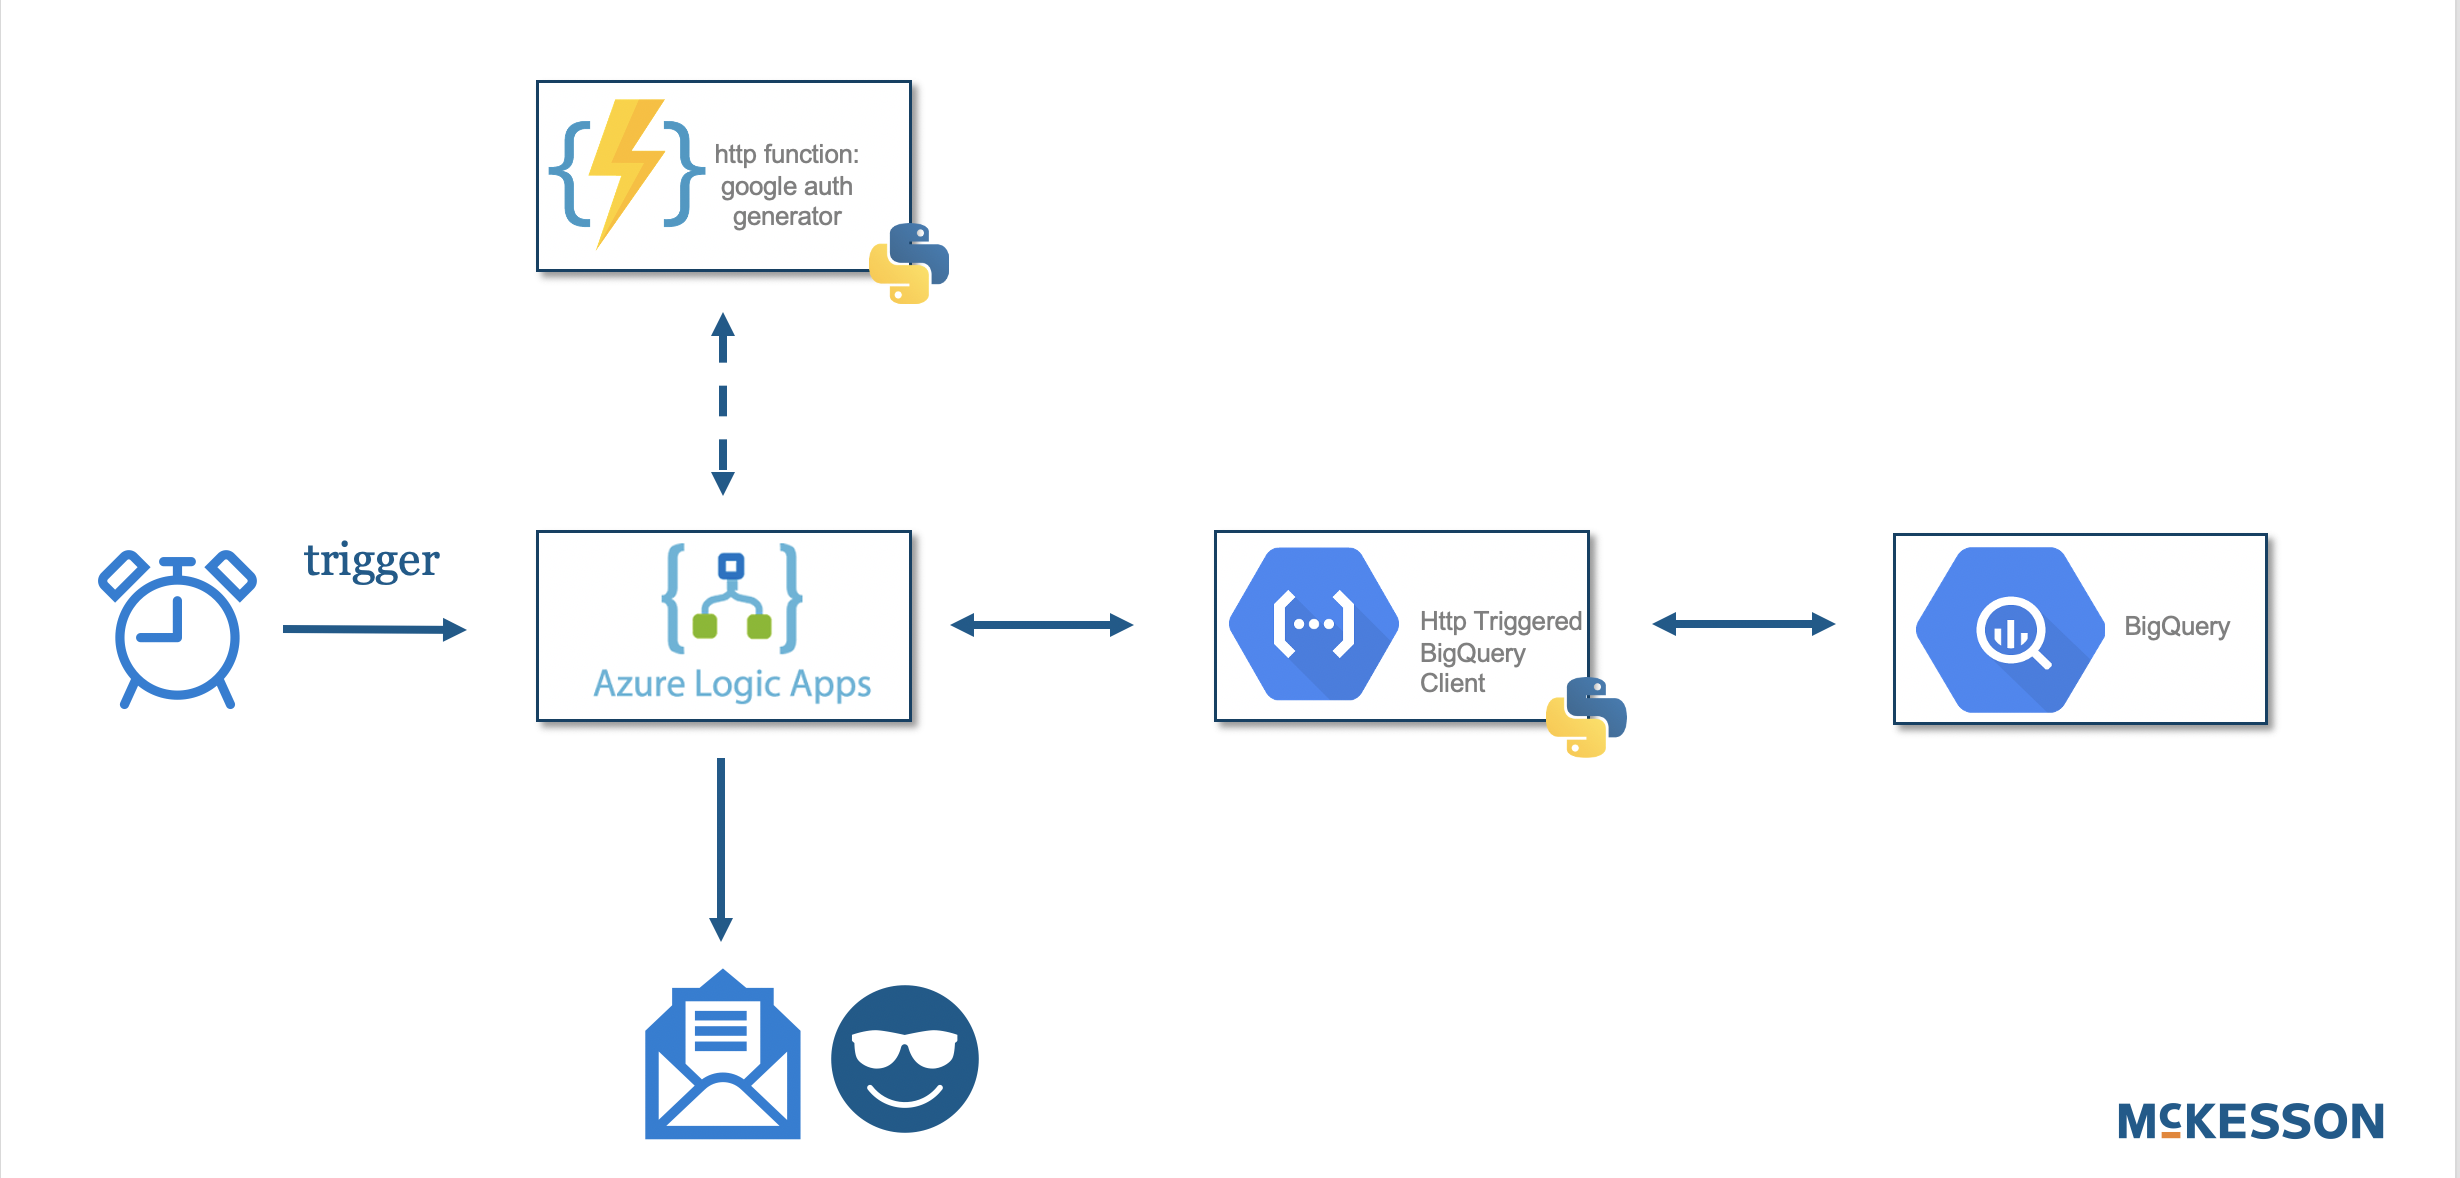

# Execution flow with Logic App

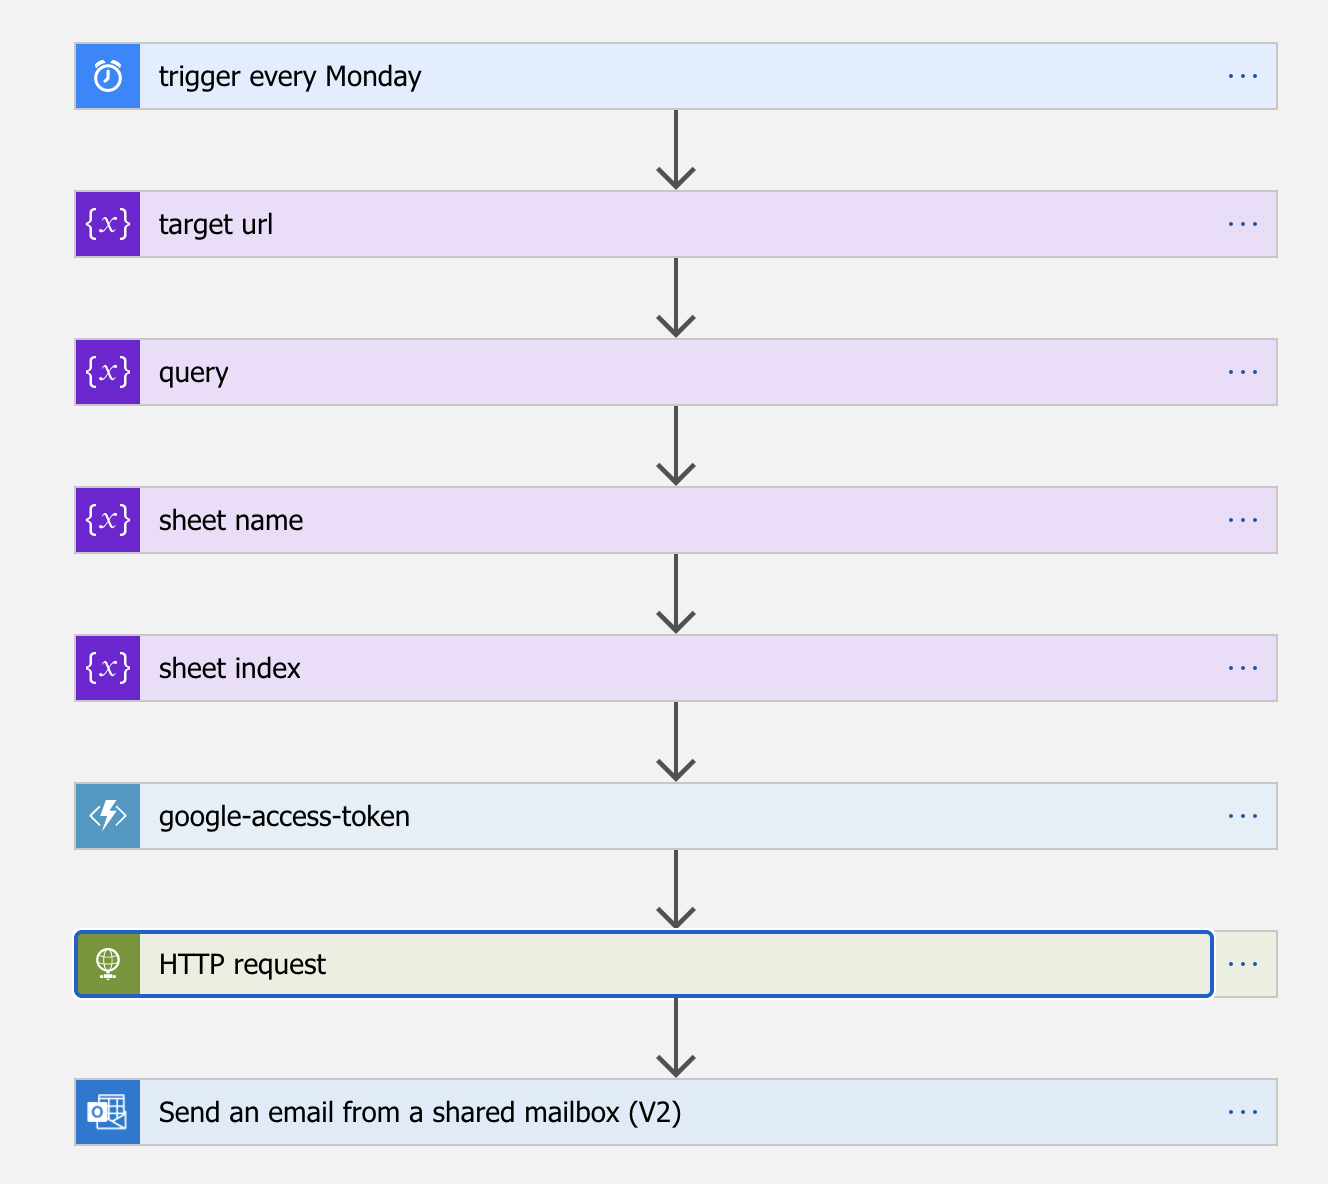

# google cloud function

In [ ]:
_doc_string = """Return excel file in response to POST request. Return function doc_string for GET request.

    Keyword Arguments for request body:
        query {str} -- standard sql `select statetment` OR
                    `stored procedure call` containing select statements
        filename {str} -- custom filename for the excel file (default: report_timestamp.xlsx)
        sheet_name {str or list} -- custom sheet name for the excel sheet. For multi statement SLECT query or stored procedure, list of sheetname should be provided (default: Sheet1, Sheet2...)
        index {bool or list} -- if ture, writes dataframe index. For multi-sheet list of bool should be provided. By default index is ignored (default: {False})

    Returns:
        mimetype="application/vnd.openxmlformats-officedocument.spreadsheetml.sheet"

    """

# get data as dataframe


In [ ]:
query = """
SELECT Order_Date, Segment, SUM( Sales) AS Sales 
FROM `mto-platanalyt-dev-4819.temptables_dev.sample_superstore_orders`
GROUP BY 1,2

"""

In [ ]:
df = bq_to_df(query)
df.head()

In [ ]:
query = """
CALL spoc_dev.demo_select_sample_superstore_orders();

"""

In [ ]:
df = bq_to_df(query)
df.head()

# write dataframe to excel in memory file

In [ ]:
import io
in_mem_file = io.BytesIO()

In [ ]:
dfs =[df]
sheet_name = 'orders'
index = [False]


dfs_to_excel(dfs, in_mem_file, sheet_name=sheet_name, index=index)
in_mem_file.seek(0)

# test output

In [ ]:
import pandas as pd

In [ ]:
pd.read_excel(in_mem_file)

# handling function input

def main(request):
    request_json = request.get_json()


    query = request_json.get('query')
    filename = request_json.get('filename')
    sheet_name = request_json.get('sheet_name')
    index = request_json.get('index')
    .
    .
    .

# handling output

    .
    .
    .
    
    from flask import send_file

    response = send_file(in_mem_file, mimetype="application/vnd.openxmlformats-officedocument.spreadsheetml.sheet",
                                    as_attachment=True, attachment_filename=filename)

    headers['requestTimestamp'] = requestDateTime
    headers["filename"] = filename
    headers['job_id'] = job_id

    return (response, 200, headers)

# handling google cloud function authentication

In [ ]:
from pyplatform.common.utils import *

service_filepath=os.environ['GOOGLE_APPLICATION_CREDENTIALS'] # dev environ



gcp_get_auth_header(credentials=service_filepath)

In [ ]:
import json

service_filepath=os.environ['GOOGLE_APPLICATION_CREDENTIALS'] # Azure functions
with open(service_filepath) as file:
    content = json.loads(file.read())

gcp_get_auth_header(credentials=content)

{Authorization: Bearer $Token}



In [ ]:
import requests
import json



In [ ]:
project= 'mto-platanalyt-dev-4819'

location = 'us-east4'
func_name = 'demo-excel-report'
url =f"https://cloudfunctions.googleapis.com/v1/projects/{project}/locations/{location}/functions/{func_name}"


access_token = gcp_get_auth_header()

# target_url = 'https://us-east4-mto-platanalyt-dev-4819.cloudfunctions.net/demo-excel-report'

headers = {"Content-Type":"Application/json","Authorization": access_token         
        }

In [ ]:
response = requests.request('GET',url, headers=headers)
response.status_code

In [ ]:
response.json()